In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [232]:
Stars = pd.read_csv('total_stars.csv')
Stars.tail()

,Unnamed: 0.1,Star_name,Distance,Mass,Radius,Luminosity,Unnamed: 6,Unnamed: 0,Star_name.1,Distance.1,Mass.1,Radius.1
248,187,187,2MASSI J2356547-155310,74.0,0.07636704,0.11201167000000001,NaN,NaN,NaN,NaN,NaN,NaN
249,225,225,WISE 0410+1502,20.0,0.005727528,0.12023270999999998,NaN,NaN,NaN,NaN,NaN,NaN
250,229,229,WISE 0458+6434A,35.9,0.014318820000000001,0.4316046,NaN,NaN,NaN,NaN,NaN,NaN
251,230,230,WISE 0458+6434B,35.9,0.00954588,0.39049939999999994,NaN,NaN,NaN,NaN,NaN,NaN
252,284,284,WISE 1405+5534,25.3,0.028637640000000002,0.08837618,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
Stars.head()

,Unnamed: 0.1,Star_name,Distance,Mass,Radius,Luminosity,Unnamed: 6,Unnamed: 0,Star_name.1,Distance.1,Mass.1,Radius.1
0,0,Sun,0.000015813,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sirius,0008.6,2.1,1.71Â´,25.4,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Canopus,0310,15,71,"13,500",NaN,NaN,NaN,NaN,NaN,NaN
3,3,Alpha Centauri,0004.4,1.1,1.2,2,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Arcturus,0037,1.1,26,170,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
Stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  253 non-null    int64  
 1   Star_name     253 non-null    object 
 2   Distance      253 non-null    object 
 3   Mass          252 non-null    object 
 4   Radius        253 non-null    object 
 5   Luminosity    253 non-null    object 
 6   Unnamed: 6    0 non-null      float64
 7   Unnamed: 0    0 non-null      float64
 8   Star_name.1   0 non-null      float64
 9   Distance.1    0 non-null      float64
 10  Mass.1        0 non-null      float64
 11  Radius.1      0 non-null      float64
dtypes: float64(6), int64(1), object(5)
memory usage: 23.8+ KB


We need to split the dataframe on index 96. All columns have been moved by one index. </br> We also need to remove all the empty columns

In [235]:
Stars_1st = Stars[:95]
Stars_2nd = Stars[96:len(Stars.index)]

In [236]:
Stars_2nd.drop(columns=['Unnamed: 0.1', 'Unnamed: 6', 'Unnamed: 0', 'Star_name.1', 'Distance.1', 'Mass.1', 'Radius.1'], inplace=True)

/var/folders/vp/_k50w21x033cx90pwm5wxzxc0000gn/T/ipykernel_76448/1738629901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stars_2nd.drop(columns=['Unnamed: 0.1', 'Unnamed: 6', 'Unnamed: 0', 'Star_name.1', 'Distance.1', 'Mass.1', 'Radius.1'], inplace=True)


In [237]:
Stars_1st.drop(columns=['Unnamed: 0.1', 'Unnamed: 6', 'Unnamed: 0', 'Star_name.1', 'Distance.1', 'Mass.1', 'Radius.1', 'Luminosity'], inplace=True)

/var/folders/vp/_k50w21x033cx90pwm5wxzxc0000gn/T/ipykernel_76448/3902920330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stars_1st.drop(columns=['Unnamed: 0.1', 'Unnamed: 6', 'Unnamed: 0', 'Star_name.1', 'Distance.1', 'Mass.1', 'Radius.1', 'Luminosity'], inplace=True)


In [238]:
Stars_2nd.rename(columns={'Star_name':'index_col', 'Distance': 'Star_name', 'Mass':'Distance', 'Radius':'Mass', 'Luminosity':'Radius'}, inplace=True)
Stars_2nd.drop(columns=['index_col'], inplace=True)

/var/folders/vp/_k50w21x033cx90pwm5wxzxc0000gn/T/ipykernel_76448/1763870935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stars_2nd.rename(columns={'Star_name':'index_col', 'Distance': 'Star_name', 'Mass':'Distance', 'Radius':'Mass', 'Luminosity':'Radius'}, inplace=True)
/var/folders/vp/_k50w21x033cx90pwm5wxzxc0000gn/T/ipykernel_76448/1763870935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stars_2nd.drop(columns=['index_col'], inplace=True)


In [239]:
New_Stars = pd.concat([Stars_1st, Stars_2nd])
New_Stars.sample(10)

,Star_name,Distance,Mass,Radius
180,TWA 28,180.0,0.034365168,0.24560357
44,Alsephina[2],0080,2.4,2.9
237,2MASS J21392676+0220226,32.1,0.043911048,0.09865247999999999
135,2MASS J04285096-2253227Â [de],85.0,0.07636704,0.11201167000000001
97,2MASS J00242463-0158201,37.7,0.075412452,0.11201167000000001
11,Hadar,0390,10.5,8.6
1,Sirius,0008.6,2.1,1.71Â´
206,CFBDSIR 1458+10B,104.0,0.008591292,0.13359189999999999
192,Kelu-1A,61.0,0.060139044,0.10070773999999999
148,2MASS J06085283-2753583,102.0,0.036274344,0.15517213


In [240]:
New_Stars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 0 to 252
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Star_name  252 non-null    object
 1   Distance   252 non-null    object
 2   Mass       251 non-null    object
 3   Radius     252 non-null    object
dtypes: object(4)
memory usage: 9.8+ KB


In [241]:
def ConvertToFloat(value):
    try:
        value = float(str(value))
        return value
    except:
        try:
            value = str(value).replace(',', '.')
            value = float(value)
            return value
        except:
            return np.NaN
        
New_Stars['Distance']   = New_Stars['Distance'].apply(ConvertToFloat)
New_Stars['Mass']       = New_Stars['Mass'].apply(ConvertToFloat)
New_Stars['Radius']     = New_Stars['Radius'].apply(ConvertToFloat)

New_Stars.tail()

,Star_name,Distance,Mass,Radius
248,2MASSI J2356547-155310,74.0,0.076367,0.112012
249,WISE 0410+1502,20.0,0.005728,0.120233
250,WISE 0458+6434A,35.9,0.014319,0.431605
251,WISE 0458+6434B,35.9,0.009546,0.390499
252,WISE 1405+5534,25.3,0.028638,0.088376


In [242]:
New_Stars.dropna(inplace=True)
New_Stars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 0 to 252
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Star_name  237 non-null    object 
 1   Distance   237 non-null    float64
 2   Mass       237 non-null    float64
 3   Radius     237 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.3+ KB


In [243]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

MinMaxing = MinMaxScaler()
Std = StandardScaler()
data = MinMaxing.fit_transform(New_Stars[['Distance', 'Mass', 'Radius']])
data1 = Std.fit_transform(New_Stars[['Distance', 'Mass', 'Radius']])
X_train, X_test = train_test_split(data, test_size=0.2)
X_train1, X_test1 = train_test_split(data1, test_size=0.2)

In [244]:
from sklearn.cluster import KMeans


/Users/jeffreylepage/miniforge3/envs/integration/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


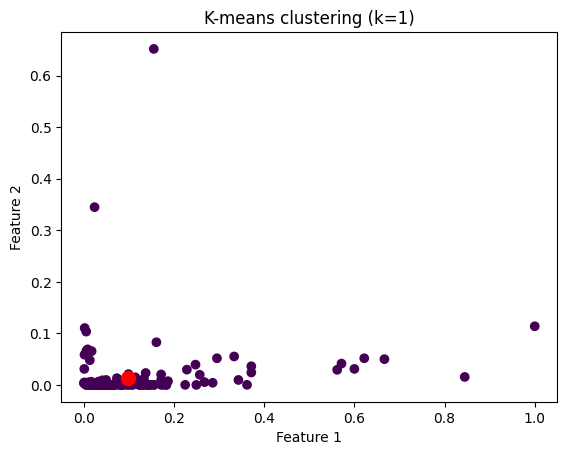

/Users/jeffreylepage/miniforge3/envs/integration/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


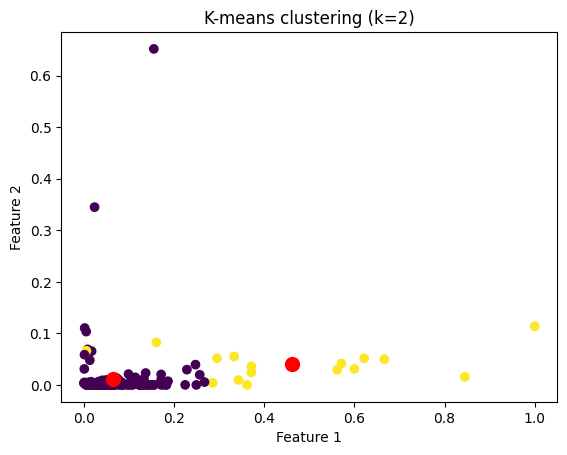

/Users/jeffreylepage/miniforge3/envs/integration/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


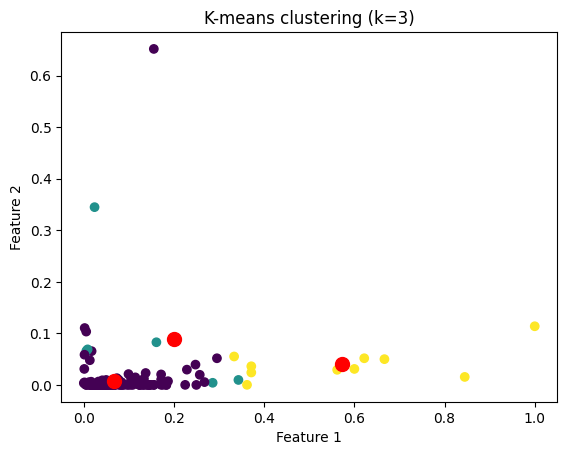

/Users/jeffreylepage/miniforge3/envs/integration/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


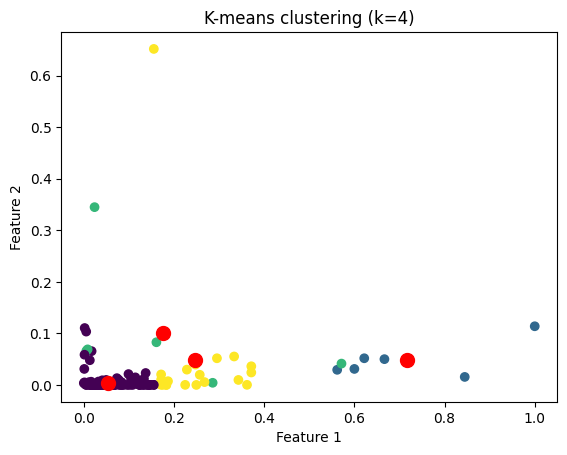

/Users/jeffreylepage/miniforge3/envs/integration/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


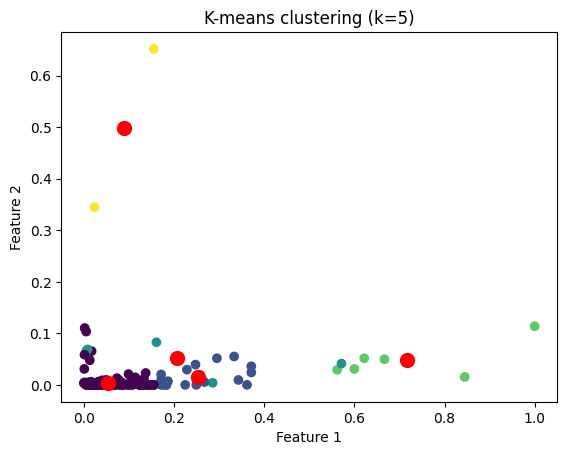

/Users/jeffreylepage/miniforge3/envs/integration/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


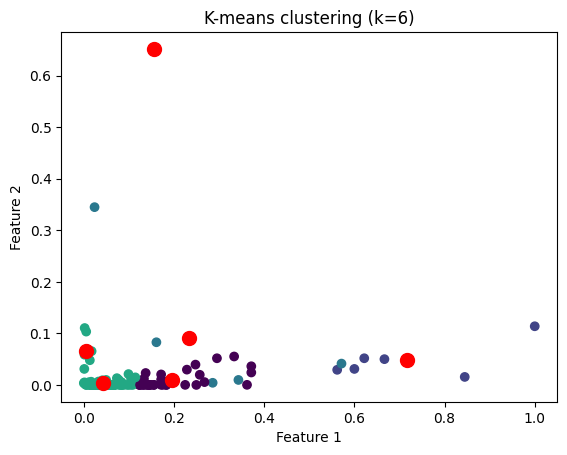

/Users/jeffreylepage/miniforge3/envs/integration/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


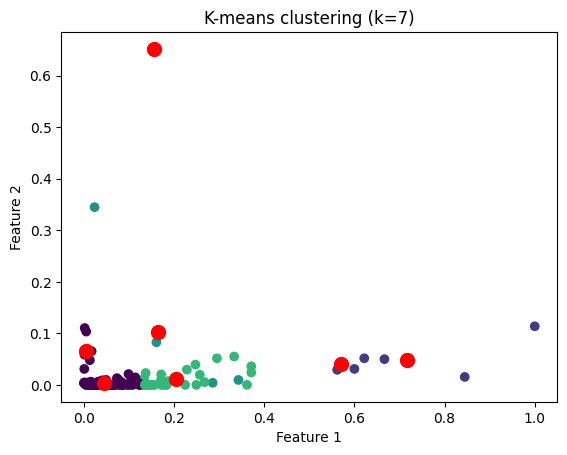

/Users/jeffreylepage/miniforge3/envs/integration/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


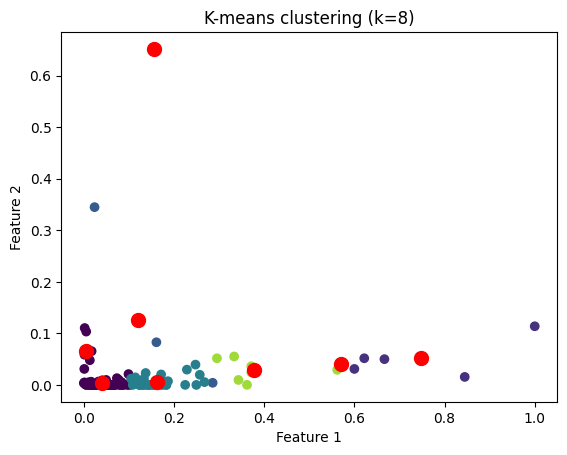

/Users/jeffreylepage/miniforge3/envs/integration/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


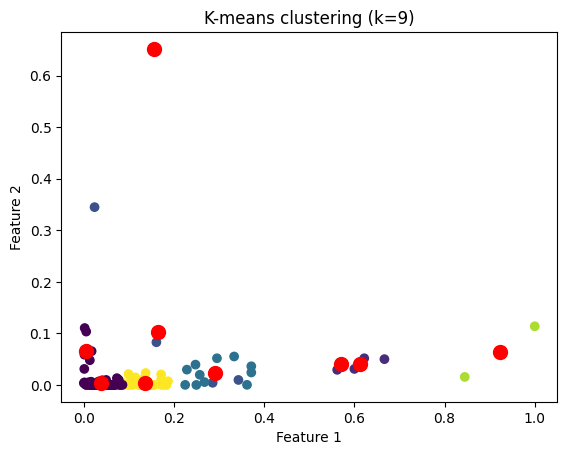

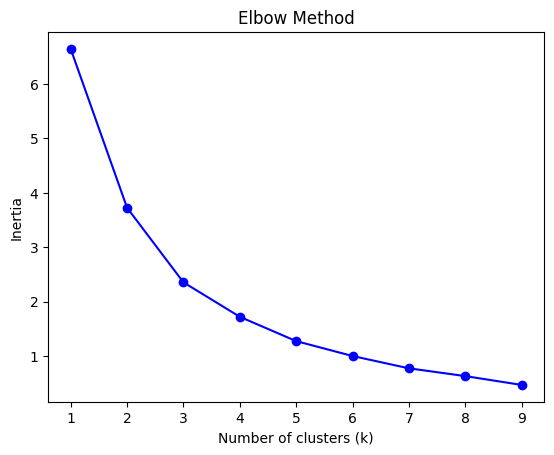

In [245]:
# Create a range of values for k
k_range = range(1, 10)

# Initialize an empty list to 
# store the inertia values for each k
inertia_values = []

# Fit and plot the data for each k value
for k in k_range:
	kmeans = KMeans(n_clusters=k, \
					init='k-means++', random_state=42)
	y_kmeans = kmeans.fit_predict(X_train)
	inertia_values.append(kmeans.inertia_)
	plt.scatter(X_train[:, 0], X_train[:, 1], c=y_kmeans)
	plt.scatter(kmeans.cluster_centers_[:, 0],\
				kmeans.cluster_centers_[:, 1], \
				s=100, c='red')
	plt.title('K-means clustering (k={})'.format(k))
	plt.xlabel('Feature 1')
	plt.ylabel('Feature 2')
	plt.show()

# Plot the inertia values for each k
plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


/Users/jeffreylepage/miniforge3/envs/integration/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


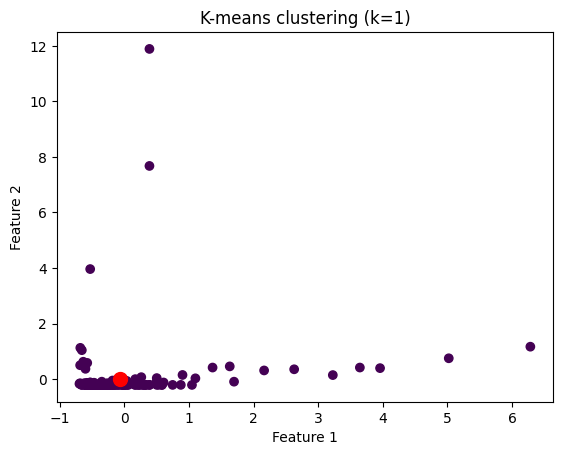

/Users/jeffreylepage/miniforge3/envs/integration/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


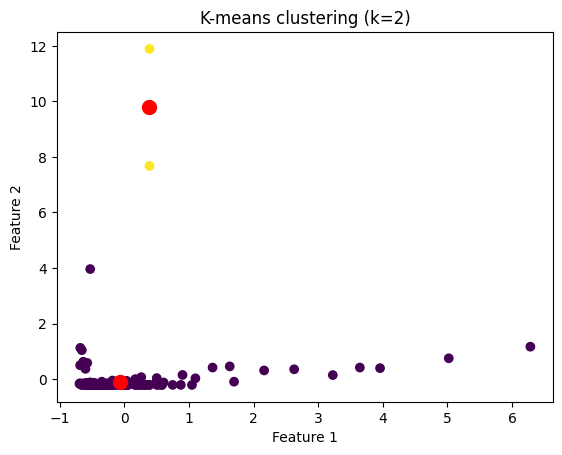

/Users/jeffreylepage/miniforge3/envs/integration/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


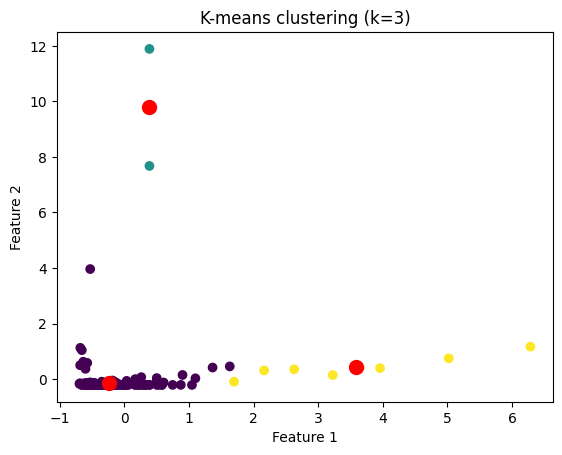

/Users/jeffreylepage/miniforge3/envs/integration/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


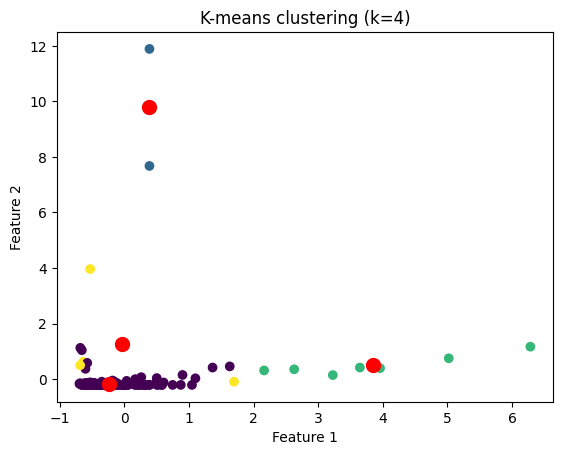

/Users/jeffreylepage/miniforge3/envs/integration/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


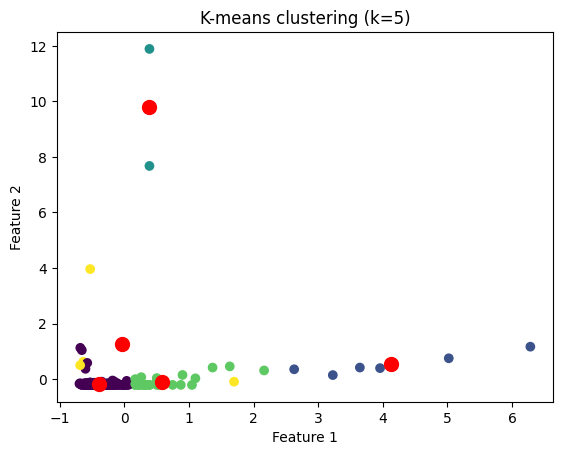

/Users/jeffreylepage/miniforge3/envs/integration/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


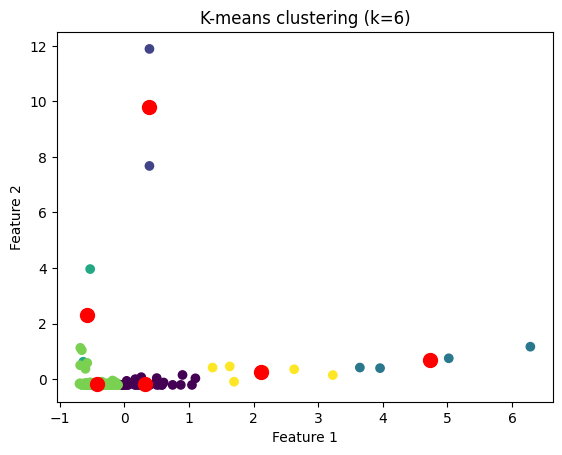

/Users/jeffreylepage/miniforge3/envs/integration/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


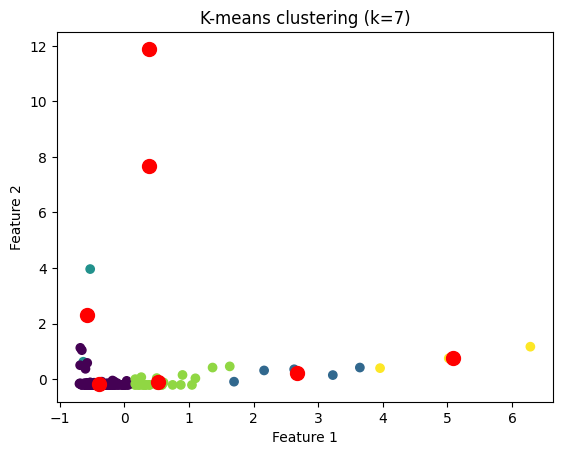

/Users/jeffreylepage/miniforge3/envs/integration/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


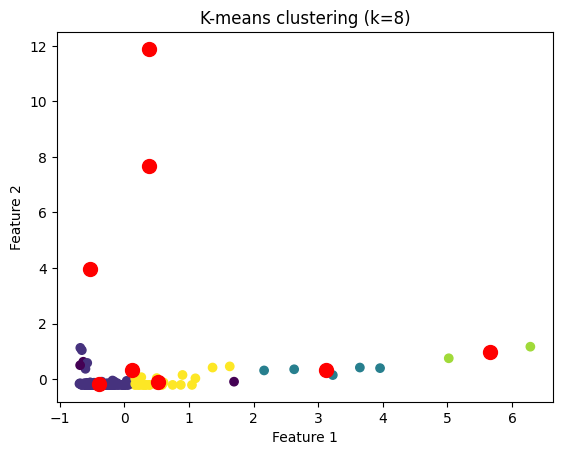

/Users/jeffreylepage/miniforge3/envs/integration/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


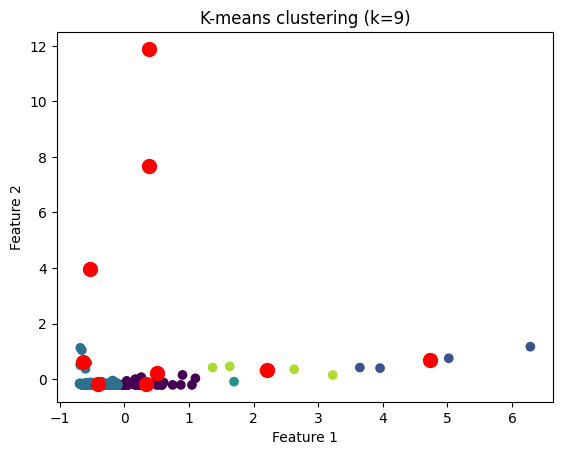

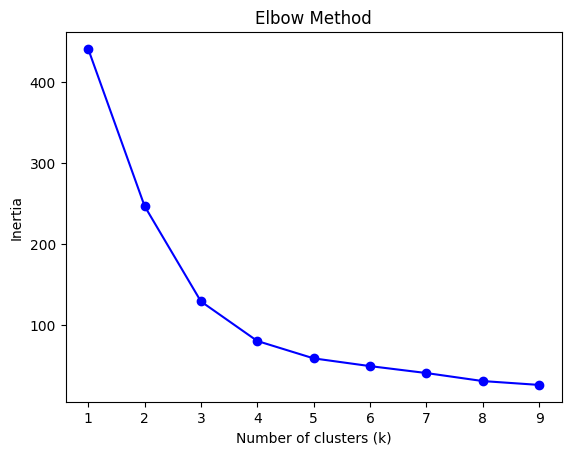

In [247]:
# Create a range of values for k
k_range = range(1, 10)

# Initialize an empty list to 
# store the inertia values for each k
inertia_values = []

# Fit and plot the data for each k value
for k in k_range:
	kmeans = KMeans(n_clusters=k, \
					init='k-means++', random_state=42)
	y_kmeans = kmeans.fit_predict(X_train1)
	inertia_values.append(kmeans.inertia_)
	plt.scatter(X_train1[:, 0], X_train1[:, 1], c=y_kmeans)
	plt.scatter(kmeans.cluster_centers_[:, 0],\
				kmeans.cluster_centers_[:, 1], \
				s=100, c='red')
	plt.title('K-means clustering (k={})'.format(k))
	plt.xlabel('Feature 1')
	plt.ylabel('Feature 2')
	plt.show()

# Plot the inertia values for each k
plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()
